<a href="https://colab.research.google.com/github/JoseDRamirezM/TELE-I/blob/main/FINALTELE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto teleinformatica I

Integrantes


*   José David Ramírez Maldonado 20181020047



# 1. Conexión a la Twitter API y obtención de tweets

In [ ]:
import tweepy
import pandas as pd
import datetime

# Credenciales para el API
consumer_key = 'jUmTcpi1Kym8xTNnDXhWK3sY5'
consumer_secret = 'UDh0k7DEDf2qH8myDkXyYJx8whO5KnzHhed3HDMR5k1O1Ea0TU'

# Objeto que realiza la autenticación 
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Objeto que permite el consumo de la API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


# Cadena con las palabras clave con las que se seleccionan los tweets
query = "estudiantes OR universidad OR icfes OR ecaes OR estudiante"
query += " OR Estudiantes OR Estudiante OR ICFES OR ECAES" 

# Parámetro que controla el idioma de los tweets
idioma = 'es'

# Número de tweets a descargar
max_tweets = 5000

# Obtener tweets
tweets = tweepy.Cursor(api.search, q=query, lang=idioma).items(max_tweets)

'''
Se crea una lista con la información de los tweets que
es útil para su análisis que es:
 # Texto del tweet
 # La fecha de publicación
 # El lugar de publicación
'''
tweets_list = [[tweet.text, tweet.created_at, tweet.user.location]
               for tweet in tweets]

# Se crea dataframe con la información
tweets_df = pd.DataFrame(tweets_list)

# Se asignan etiquetas a las columnas para facilitar su manejo
tweets_df.columns = ['Tweet', 'Fecha', 'Ubicación']

# Filtramos los tweets para personas que se encuentren en Colombia
pais = ['colombia','Colombia']

tweets_df = tweets_df[tweets_df['Ubicación'].isin(pais) ]

print(tweets_df.shape[0])

print(tweets_df)


#tweets_df['Fecha'] = tweets_df['Fecha'].apply(lambda x: x.date())


53
                                                  Tweet               Fecha  \
117   RT @Betocoralg: Estoy feliz, he vuelto a la Un... 2022-08-06 01:09:02   
191   @Nicolvl13 Así me la imaginé a la Amelia estud... 2022-08-06 01:07:20   
409   RT @icesi: Inicia el conversatorio sobre desar... 2022-08-06 01:02:58   
415   La universidad me tiene cansada, estresada, vu... 2022-08-06 01:02:48   
433   RT @DaniMayakovski: Lucha callejera combativa ... 2022-08-06 01:02:23   
560   RT @ElJuliSastoque: 🚨¡LO LOGRAMOS! 🥳😭Estamos h... 2022-08-06 00:59:37   
629   Doctor @JCastillaO me surge una consulta: una ... 2022-08-06 00:58:06   
676   RT @luzmabe1959: Será que van a salir los estu... 2022-08-06 00:57:04   
733   RT @Betocoralg: Estoy feliz, he vuelto a la Un... 2022-08-06 00:55:38   
745   @macgg_ Culpó a la Universidad El Bosque por e... 2022-08-06 00:55:24   
839   @MeMordioUnPoni Según lo que entendí es como u... 2022-08-06 00:53:05   
1330  RT @JulianProgre: Susana boreal es una jove

#2. Preprocesamiento de los tweets

In [ ]:
import spacy, re, nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
import nltk

# Naive bayes
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

# spanish input
from nltk.stem import SnowballStemmer
from spacy.lang.es import Spanish
!pip install stanza spacy-stanza

import stanza
import spacy_stanza

stanza.download("es")
nlp = spacy_stanza.load_pipeline('es')
#nlp = Spanish(path=None)
###################################
nltk.download('omw-1.4')

nltk.download('stopwords')
nltk.download('wordnet')

#nlp = spacy.load("en_core_web_sm")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2022-08-06 01:12:50 INFO: Downloading default packages for language: es (Spanish)...
2022-08-06 01:12:52 INFO: File exists: /root/stanza_resources/es/default.zip
2022-08-06 01:12:59 INFO: Finished downloading models and saved to /root/stanza_resources.


2022-08-06 01:13:01 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2022-08-06 01:13:01 INFO: Use device: cpu
2022-08-06 01:13:01 INFO: Loading: tokenize
2022-08-06 01:13:01 INFO: Loading: mwt
2022-08-06 01:13:01 INFO: Loading: pos
2022-08-06 01:13:01 INFO: Loading: lemma
2022-08-06 01:13:01 INFO: Loading: depparse
2022-08-06 01:13:01 INFO: Loading: ner
2022-08-06 01:13:03 INFO: Done loading processors!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def limpiar_tweet(tweet):
  # se eliminan mayusculas
  tweet = str(tweet).lower()
  #se eliminan nombres de usuario, hashtags y rt's
  tweet = re.sub(r"[@]\S+|[#]\S+|\b(rt)\b|[’']", '', tweet)
  # se eliminan URLs y numeros
  tweet = re.sub(r"http\S+|(\d+)", "", tweet)
  #se elimina palabra final incompleta
  tweet = re.sub(r"\w+\… *$", "", tweet)
  # se eliminan caracteres especiales
  tweet = re.sub(r"[^\w\s]", " ", tweet)
  #se eliminan saltos de linea
  tweet = re.sub(r"[\t\r\n]+", " ", tweet)
  #se eliminan espacios dobles
  tweet = re.sub(r"\s{2,}", " ", tweet)
  tweet = re.sub(r"^\s", "", tweet)
  
  return tweet

# 3. Transformaciones

## Eliminar stop words

Son palabras dentro de las categorías artículos, preposiciones, pronombres, conjunciones, etc. Ya que estas palabras no aportan mucha información.

In [ ]:
#Eliminar stopwords
stop = stopwords.words('spanish')
tweets_df['Tweet'] = tweets_df['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweets_df['Tweet'] = tweets_df['Tweet'].apply(limpiar_tweet)

## Lematizar

Reemplazar las palabras a su forma raíz (o de diccionario) según reglas léxicas para tratar cada palabra como un único ítem

manzanas -> manzana

dije -> decir

In [ ]:
# Lematizar
tweets_df['Tweet'] = tweets_df['Tweet'].apply(lambda x: " ".join([word.lemma_ for word in nlp(x)]))

tweets_df


,Tweet,Fecha,Ubicación
117,estar feliz vuelto universidad ser abogado pronto,2022-08-06 01:09:02,Colombia
191,así imaginar amelia estudiante clandestino,2022-08-06 01:07:20,Colombia
409,iniciar conversatorio desarrollo sostenible ju...,2022-08-06 01:02:58,Colombia
415,el universidad cansado estresado vuelta mierda...,2022-08-06 01:02:48,Colombia
433,lucha callejero combativo universidad distrita...,2022-08-06 01:02:23,Colombia
560,él lograr estar hacer historia aprobado proyec...,2022-08-06 00:59:37,Colombia
629,doctor surgir consulta representante estudiant...,2022-08-06 00:58:06,Colombia
676,ser ir salir estudiante médico ra línea armar ...,2022-08-06 00:57:04,Colombia
733,estar feliz vuelto universidad ser abogado pronto,2022-08-06 00:55:38,Colombia
745,culpar universidad el bosque atrocidad,2022-08-06 00:55:24,Colombia


Lematizar por el contrario genera palabras raíz "validas" y el tweet no pierde sentido

## Stemming

El stemming en la columna tweet dificulta la comprensión del texto. Resultaría útil si fuera necesario agrupar las palabras con el mismo stem

In [ ]:
# Stemming
stemmer = SnowballStemmer('spanish')

aux = tweets_df.copy()
# Se trabaja con un DataFrame independiente
aux['Tweet Stem'] = aux['Tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
aux

,Tweet,Fecha,Ubicación,Tweet Stem
117,estar feliz vuelto universidad ser abogado pronto,2022-08-06 01:09:02,Colombia,estar feliz vuelt univers ser abog pront
191,así imaginar amelia estudiante clandestino,2022-08-06 01:07:20,Colombia,asi imagin ameli estudi clandestin
409,iniciar conversatorio desarrollo sostenible ju...,2022-08-06 01:02:58,Colombia,inici conversatori desarroll sosten junt jeffr...
415,el universidad cansado estresado vuelta mierda...,2022-08-06 01:02:48,Colombia,el univers cans estres vuelt mierd pen primer ...
433,lucha callejero combativo universidad distrita...,2022-08-06 01:02:23,Colombia,luch callejer combat univers distrital bogot c...
560,él lograr estar hacer historia aprobado proyec...,2022-08-06 00:59:37,Colombia,el logr estar hac histori aprob proyect garantiz
629,doctor surgir consulta representante estudiant...,2022-08-06 00:58:06,Colombia,doctor surg consult represent estudiantil cons...
676,ser ir salir estudiante médico ra línea armar ...,2022-08-06 00:57:04,Colombia,ser ir sal estudi medic ra line armar par naci...
733,estar feliz vuelto universidad ser abogado pronto,2022-08-06 00:55:38,Colombia,estar feliz vuelt univers ser abog pront
745,culpar universidad el bosque atrocidad,2022-08-06 00:55:24,Colombia,culp univers el bosqu atroc


# 4. Minería de datos e interpretación

En esta sección se extrae el sentimiento y la polaridad de cada uno de los
tweets

In [ ]:
'''
Listas para almacenar los datos del procesamiento
y de las calificaciones de polaridad y subjetividad
'''
polaridad = []
subjetividad = []
procesamiento = []

# Iterador para cada tweet
print(tweets_df.shape[0])
for x in range(0, tweets_df.shape[0]):
  
  # Obtener tweet del DataFrame
  tweet_string = str(tweets_df.iloc[x,0])
  
  #Se limpia el tweet
  tweet_string = limpiar_tweet(tweet_string)

  #Se crea un documento nlp
  doc = nlp(tweet_string)

  '''
  Se utiliza el modelo pre-entrenado de TextBlob junto con 
  el clasificador de Bayes ingenuo
  '''
  tblob = Blobber(analyzer=NaiveBayesAnalyzer())
  # Objeto para calificación de polaridad y subjetividad
  blob = tblob(tweet_string)
  '''
  Dado que la mayoría de modelos pre-entrenados están optimizados para
  el idioma inglés se opta por traducir el tweet para aumentar la precisión
  del resultado
  '''
  try:
    translate = blob.translate(from_lang='es',to='en')
  except:
    print(blob)


  if translate:
    # Obtener valores de polaridad y subjetividad
    polaridad.append(translate.sentiment.polarity)
    subjetividad.append(translate.sentiment.subjectivity)
  else:
    polaridad.append(blob.sentiment.polarity)
    subjetividad.append(blob.sentiment.subjectivity)
  
  # Extraer la información 
  for token in doc:
    #Aquí se lematiza
    procesamiento.append([ tweets_df.iloc[x,1], token.text, token.lemma_, token.pos_, token.tag_, token.dep_, 
                          token.shape_, token.is_alpha, token.is_stop, translate.sentiment.polarity, translate.sentiment.subjectivity])
tweets_df

53


,Tweet,Fecha,Ubicación
117,estar feliz vuelto universidad ser abogado pronto,2022-08-06 01:09:02,Colombia
191,así imaginar amelia estudiante clandestino,2022-08-06 01:07:20,Colombia
409,iniciar conversatorio desarrollo sostenible ju...,2022-08-06 01:02:58,Colombia
415,el universidad cansado estresado vuelta mierda...,2022-08-06 01:02:48,Colombia
433,lucha callejero combativo universidad distrita...,2022-08-06 01:02:23,Colombia
560,él lograr estar hacer historia aprobado proyec...,2022-08-06 00:59:37,Colombia
629,doctor surgir consulta representante estudiant...,2022-08-06 00:58:06,Colombia
676,ser ir salir estudiante médico ra línea armar ...,2022-08-06 00:57:04,Colombia
733,estar feliz vuelto universidad ser abogado pronto,2022-08-06 00:55:38,Colombia
745,culpar universidad el bosque atrocidad,2022-08-06 00:55:24,Colombia


## Resumen de transformaciones

In [ ]:
#Dataframe con los tokens, lema

procesados = pd.DataFrame(procesamiento)
procesados.columns = ['Fecha', 'Texto', 'Lema', 'UPOS', 'Tag', 'Dep', 'forma', 'alpha', 'Stop', 'Polaridad', 'Subjetividad']

procesados = procesados[~procesados.UPOS.isin(['SPACE', 'PUNCT', 'NUM'])]
procesados = procesados[procesados['forma'] != 'x']
procesados = procesados[procesados['UPOS'] != 'X']

procesados

,Fecha,Texto,Lema,UPOS,Tag,Dep,forma,alpha,Stop,Polaridad,Subjetividad
0,2022-08-06 01:09:02,estar,estar,AUX,AUX,cop,xxxx,True,True,0.8,1.0
1,2022-08-06 01:09:02,feliz,feliz,ADJ,ADJ,root,xxxx,True,False,0.8,1.0
2,2022-08-06 01:09:02,vuelto,vuelto,ADJ,ADJ,amod,xxxx,True,False,0.8,1.0
3,2022-08-06 01:09:02,universidad,universidad,NOUN,NOUN,nsubj,xxxx,True,False,0.8,1.0
4,2022-08-06 01:09:02,ser,ser,AUX,AUX,cop,xxx,True,True,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
462,2022-08-05 23:24:13,vuelto,vuelto,ADJ,ADJ,amod,xxxx,True,False,0.8,1.0
463,2022-08-05 23:24:13,universidad,universidad,NOUN,NOUN,nsubj,xxxx,True,False,0.8,1.0
464,2022-08-05 23:24:13,ser,ser,AUX,AUX,cop,xxx,True,True,0.8,1.0
465,2022-08-05 23:24:13,abogado,abogado,NOUN,NOUN,csubj,xxxx,True,False,0.8,1.0


In [ ]:
#tweets_df['Tweet'] = tweets_df['Tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))


#Dataframe con el texto de los tweets completo y su valor de sentimiento
tweets_df['Polaridad'] = polaridad
tweets_df['Subjetividad'] = subjetividad

tweets_df

,Tweet,Fecha,Ubicación,Polaridad,Subjetividad
117,estar feliz vuelto universidad ser abogado pronto,2022-08-06 01:09:02,Colombia,0.800000,1.000000
191,así imaginar amelia estudiante clandestino,2022-08-06 01:07:20,Colombia,0.000000,0.000000
409,iniciar conversatorio desarrollo sostenible ju...,2022-08-06 01:02:58,Colombia,0.000000,0.000000
415,el universidad cansado estresado vuelta mierda...,2022-08-06 01:02:48,Colombia,-0.116667,0.611111
433,lucha callejero combativo universidad distrita...,2022-08-06 01:02:23,Colombia,0.000000,0.000000
560,él lograr estar hacer historia aprobado proyec...,2022-08-06 00:59:37,Colombia,0.000000,0.000000
629,doctor surgir consulta representante estudiant...,2022-08-06 00:58:06,Colombia,0.700000,0.900000
676,ser ir salir estudiante médico ra línea armar ...,2022-08-06 00:57:04,Colombia,0.000000,0.000000
733,estar feliz vuelto universidad ser abogado pronto,2022-08-06 00:55:38,Colombia,0.800000,1.000000
745,culpar universidad el bosque atrocidad,2022-08-06 00:55:24,Colombia,0.000000,0.000000


# Estadistica descriptiva

# Distribución

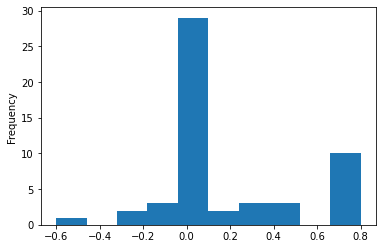

In [ ]:
tweets_df['Polaridad'].plot(kind='hist')

Una gran parte de los valores de polaridad para los tweets están al rededor de cero.

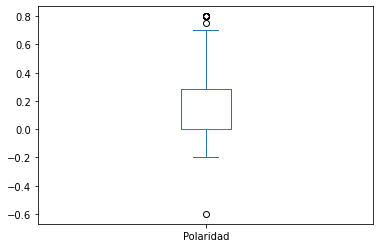

In [ ]:
tweets_df['Polaridad'].plot(kind='box')

Como los valores van de -1 a 1, vemos la mediana en 0.0 (Q2) y vemos que los valores de polaridad son poco dispersos respecto a la media.

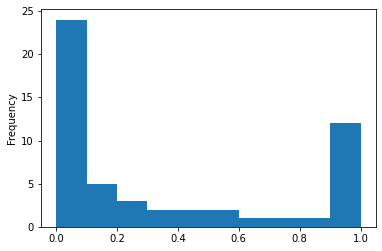

In [ ]:
tweets_df['Subjetividad'].plot(kind='hist')

La mayoría de tweets tienen un valor de subjetividad de 0 es decir que son muy objetivos

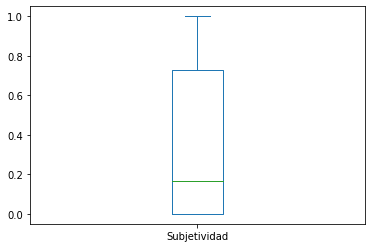

In [ ]:
tweets_df['Subjetividad'].plot(kind='box')

Vemos la mediana (Q2) cercana a cero y la gráfica con indica valores de subjetividad dispersos respecto a la media.

# Tendencia central

In [ ]:
tweets_df['Polaridad'].mean()

0.17224332271502085

In [ ]:
tweets_df['Polaridad'].median()

0.0

In [ ]:
tweets_df['Polaridad'].mode()

0    0.0
dtype: float64

Concuerda con lo que se vio en el diagrama de cajas

Concuerda con lo que se vio en el histograma

In [ ]:
tweets_df['Subjetividad'].mean()

0.34526600234147403

In [ ]:
tweets_df['Subjetividad'].median()

0.16666666666666666

In [ ]:
tweets_df['Subjetividad'].mode()

0    0.0
dtype: float64

# Dispersion

Rango, varianza, desviación

In [ ]:
import statistics as st
import numpy as np

x = tweets_df['Polaridad'].values
y = tweets_df['Subjetividad'].values

rango = x.max() - x.min()
rango

1.4

In [ ]:
st.pvariance(x)

0.11341852230949429

In [ ]:
st.variance(x)

0.11559964773852302

In [ ]:
np.std(x)

0.33677666532806916

Variación máxima entre los valores de polaridad

El valor de la varianza es muy cercano al de la media 0.0, lo que indica que los datos casi no están dispersos.

Es la desviación de la polaridad con respecto a su promedio

In [ ]:
rango = y.max() - y.min()
rango

1.0

In [ ]:
st.pvariance(y)

0.15870800157449327

In [ ]:
st.variance(y)

0.1617600785278489

In [ ]:
np.std(y)

0.398381728464664

Variación máxima entre los valores de subjetividad

Al igual que en la polaridad, los datos de subjetividad no están muy dispersos de su media.

Es la desviación de la subjetiividad con respecto a su promedio

# Relacion entre variables

In [ ]:
np.cov(x, y)

array([[0.11559965, 0.10124084],
       [0.10124084, 0.16176008]])

Text(0, 0.5, 'subjetividad')

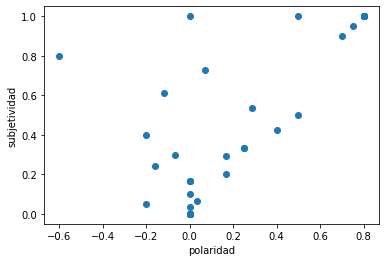

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('polaridad')
plt.ylabel('subjetividad')

La covarianza es positiva. Indica que las dos variables tienen una relación directa. Cuando una crece la otra también.

In [ ]:
np.corrcoef(x, y)

array([[1.        , 0.74035806],
       [0.74035806, 1.        ]])

In [ ]:
from scipy import stats
stats.pearsonr(x, y)

(0.7403580629359803, 2.359973863713768e-10)

Existe una correlación positiva entre la poralidad y la subjetividad.

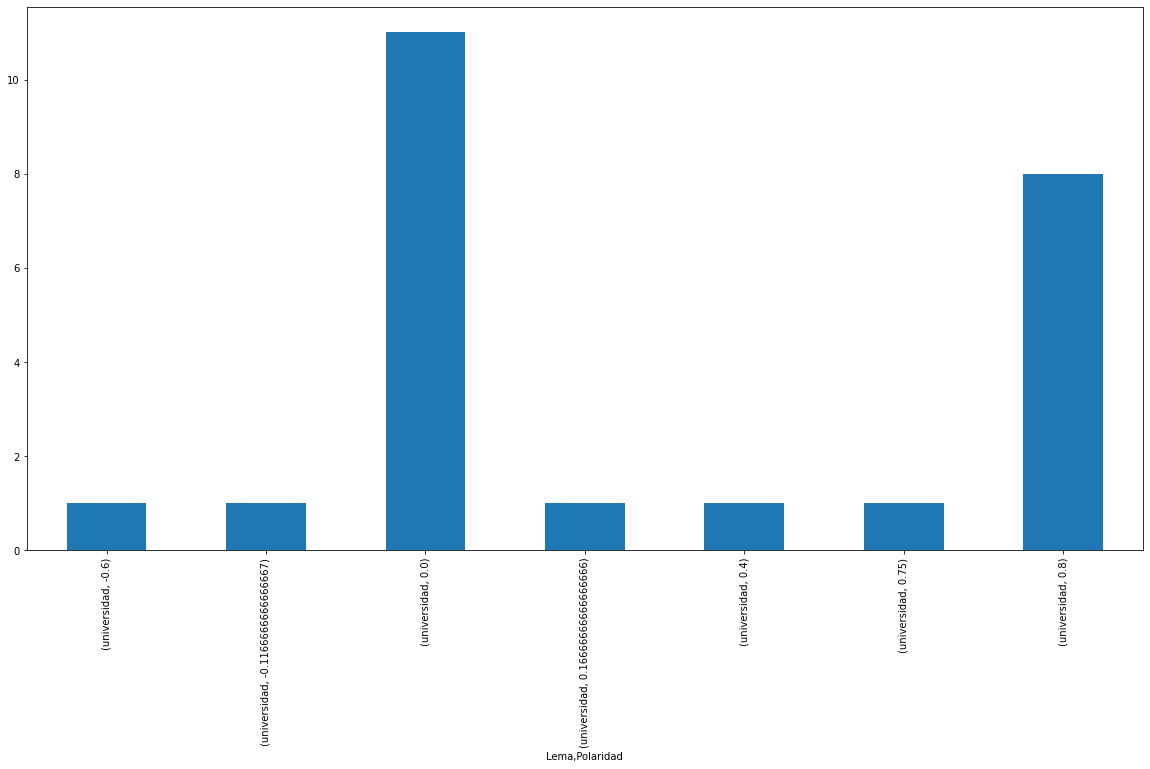

In [ ]:
procesados[procesados['Lema'] == 'universidad'].groupby(['Lema', 'Polaridad'])['Polaridad'].count().plot(kind='bar',figsize=(20,10))

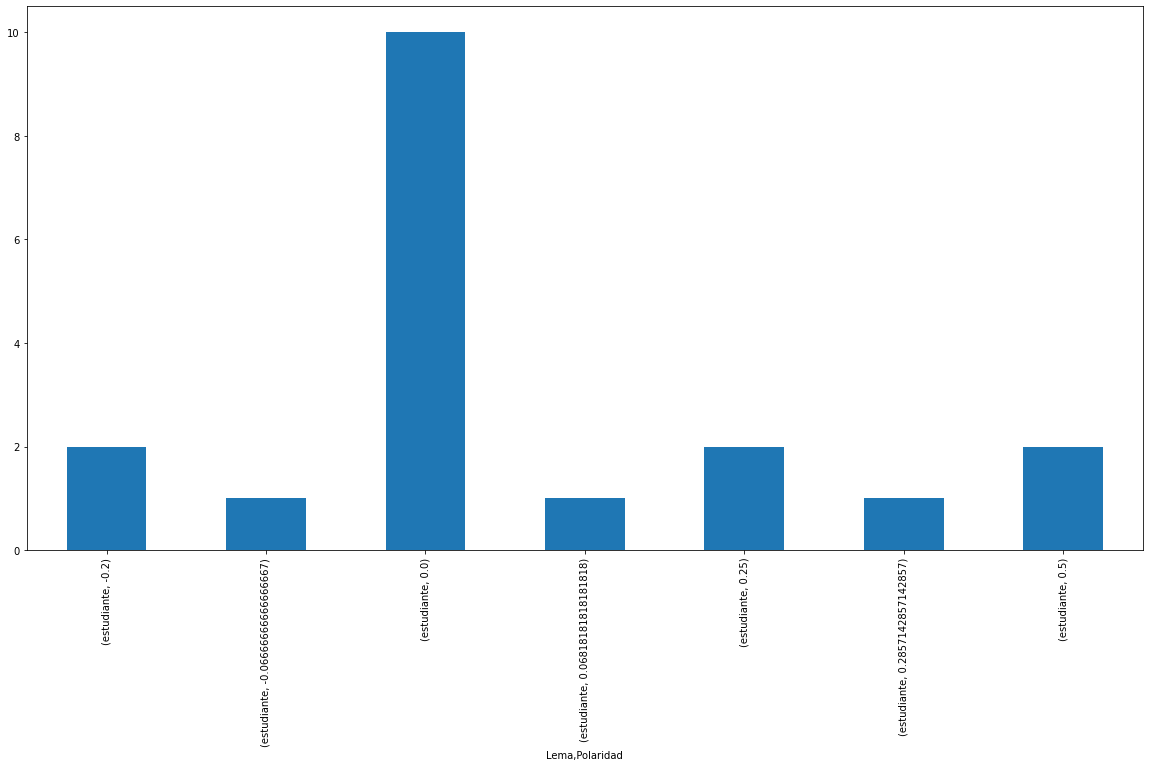

In [ ]:
procesados[procesados['Lema'] == 'estudiante'].groupby(['Lema', 'Polaridad'])['Polaridad'].count().plot(kind='bar',figsize=(20,10))


# Análisis de sentimientos

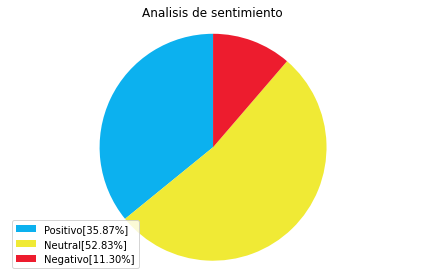

In [ ]:
import time
from datetime import datetime

def porcentaje(part, whole):
    return 100*float(part)/float(whole)

def analisis_sentimientos(datos, cantidad):

    positivo = 0
    negativo = 0
    neutral = 0
    polaridad = 0
    polarity_list = datos
    numbers_list = []
    number = 1
    
    #analisis de los tweets 
    for valor in datos:
        polaridad += valor # blob.sentiment.polarity
        if(valor == 0):
            neutral += 1
        elif(valor < 0.00):
            negativo += 1
        elif(valor > 0.00):
            positivo += 1

    #Asignacion de porcentajes 
    positivo = porcentaje(positivo, cantidad) 
    negativo = porcentaje(negativo, cantidad)
    neutral = porcentaje(neutral, cantidad)
    
    #Asignacion a dos decimales 
    positivo = format(positivo, ".2f")
    negativo = format(negativo, ".2f")
    neutral = format(neutral, ".2f")
    
    #Impresion de la torta de porcentajes 
    labels = ["Positivo["+str(positivo)+"%]", "Neutral["+str(neutral)+"%]",
                "Negativo["+str(negativo)+"%]"]
    sizes = [positivo, neutral, negativo]
    colors = ["#0CB1EF","#F0EA35","#ED1C2E"]
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc = "best")
    plt.title("Analisis de sentimiento")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()


analisis_sentimientos(procesados['Polaridad'].values, len(procesados['Polaridad'].values))


In [ ]:
def analisis_subjetividad(datos, cantidad):

    # Variables para almacenar porcentajes
    subjetivos = 0
    objetivos = 0
    polaridad = 0
    polarity_list = datos
    numbers_list = []
    number = 1
    
    for valor in datos:
      if (valor < 0.5):
          objetivos += 1
      else:
          subjetivos += 1

    #Asignacion de porcentajes 
    objetivos = porcentaje(objetivos, cantidad)
    subjetivos = porcentaje(subjetivos, cantidad)
    
    #Asignacion a dos decimales 
    objetivos = format(objetivos, ".2f")
    subjetivos = format(subjetivos, ".2f")

    #Impresion de la torta de porcentajes 
    labels = ["Objetivo["+str(objetivos)+"%]", "Subjetivo["+str(subjetivos)+"%]"]
    sizes = [objetivos, subjetivos]
    colors = ["#0CB1EF","#F0EA35"]
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc = "best")
    plt.title("Analisis de Subjetividad")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()


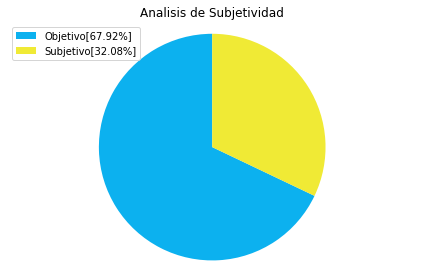

In [ ]:
analisis_subjetividad(tweets_df['Subjetividad'].values, len(tweets_df['Subjetividad'].values))

Como se puede apreciar en la primera gráfica más del 50 % de tweets analizados tienen un caracter neutro, el 35% son positivos y el 11% son negativos.

**Conclusiones**

La mayoría de tweets con la palabra coronavirus carecen de sentimiento, a pesar de esto el procentaje de tweets con una sentimiento positivo es mayor al negativo